# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
import scipy.special as sp
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import pymangle
from scipy.optimize import curve_fit
%matplotlib inline

In [ ]:
dr7full=ascii.read("./input/DR7-Full.ascii")
dr7full

In [ ]:
z=dr7full['col3']
rad=dr7full['col1']
decd=dr7full['col2']

In [28]:
#Ez = lambda x: 1.0/m.sqrt(0.3*(1+x)**3+0.7)
Om=0.25
Ol=0.75
Ok=0.0
def Ez(zv):
    return 1.0/m.sqrt(Om*(1.0+zv)**3+Ok*(1.0+zv)**2+Ol)

np.vectorize(Ez)
#Calculate comoving distance of a data point using the Redshift - This definition is based on the cosmology model we take. Here the distance for E-dS universe is considered. Also note that c/H0 ratio is cancelled in the equations and hence not taken.

In [29]:
def DC_LCDM(z):
  return integrate.quad(Ez, 0, z)[0]
DC_LCDM=np.vectorize(DC_LCDM)

In [30]:
DC_LCDM(2.0)

array(1.2660810187999292)

In [ ]:
DC=DC_LCDM(z)
DC

In [ ]:
dr7f = open("./output/DR72srarflcdm1.dat",'w')
dr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dr7full)):
    dr7f.write("%f\t " %z[i])
    dr7f.write("%f\t %f\t " %(rad[i],decd[i]))
    dr7f.write("%f\t " %DC[i])
    dr7f.write("%f\t %f\n " %(rad[i]*pi/180.0,decd[i]*pi/180.0))
dr7f.close()

In [6]:
data=ascii.read("./output/DR72srarflcdm1.dat")

In [ ]:
data['z']

In [ ]:
data['s']

In [ ]:
data['rar']

In [ ]:
data['decr']

In [ ]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [ ]:
pixdata = open("./output/pixdatadr72VAGCfulllcdm1.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(data['ra'][i],data['dec'][i]))
pixdata.close()

In [ ]:
pixdata = ascii.read("./output/pixdatadr72VAGCfulllcdm1.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [ ]:
hpixdata

In [ ]:
hu.mollview(hpixdata,rot=180)

In [ ]:
mangle=pymangle.Mangle("./masks/")

Ref: https://pypi.python.org/pypi/pymangle/

In [ ]:
%%time
rar,decr=mangle.genrand(2*len(data))

In [22]:
dataR=ascii.read("./output/rand200kdr72.dat")

In [23]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [24]:
dataR['ra']

171.460447
156.861634
135.655956
151.1135
327.045321
222.706587
132.163348
214.239217
310.627283
143.795051
168.941476


In [25]:
dataR['dec']

14.210816
40.750823
19.592957
24.245002
-7.737766
21.927202
15.281744
5.973424
1.01386
15.993848
43.319462


In [31]:
DCr=DC_LCDM(dataR['z'])

In [32]:
rdr7f = open("./output/rDR72srarflcdm1.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dataR)):
    rdr7f.write("%f\t " %dataR['z'][i])
    rdr7f.write("%f\t %f\t " %(dataR['ra'][i],dataR['dec'][i]))
    rdr7f.write("%f\t " %DCr[i])
    rdr7f.write("%f\t %f\n " %(dataR['ra'][i]*pi/180.0,dataR['dec'][i]*pi/180.0))
rdr7f.close()

In [ ]:
r=ascii.read("./output/rDR7200kLCsrarf.dat")

In [ ]:
rar

In [ ]:
decr

In [ ]:
zr=np.array([data['z'],data['z']])

In [ ]:
zr

In [ ]:
zr=zr.flatten()

In [ ]:
zr

In [ ]:
print len(zr)
print len(decr)

In [ ]:
rdr7f = open("./output/rDR72srarf.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(zr)):
    rdr7f.write("%f\t " %zr[i])
    rdr7f.write("%f\t %f\t " %(rar[i]*180.0/pi,decr[i]*180.0/pi))
    rdr7f.write("%f\t " %DC_LCDM(zr[i]))
    rdr7f.write("%f\t %f\n " %(rar[i],decr[i]))
rdr7f.close()

In [ ]:
dataR=ascii.read("./output/rDR72srarf.dat")

In [ ]:
dataR['z']

In [2]:
dat=ascii.read("./output/DR72srarflcdm1.dat")

In [3]:
dat=np.array([dat['s'],dat['rar'],dat['decr']])

In [7]:
dat.reshape(3,len(data['s']))

array([[ 0.408923,  0.33995 ,  0.378663, ...,  0.340754,  0.211635,
         0.322813],
       [ 0.980185,  1.016617,  0.950251, ...,  2.830242,  2.831786,
         2.838233],
       [-0.003863,  0.003776,  0.010821, ...,  0.172112,  0.173661,
         0.173055]])

In [8]:
dat=dat.transpose()

In [9]:
dat

array([[ 0.408923,  0.980185, -0.003863],
       [ 0.33995 ,  1.016617,  0.003776],
       [ 0.378663,  0.950251,  0.010821],
       ..., 
       [ 0.340754,  2.830242,  0.172112],
       [ 0.211635,  2.831786,  0.173661],
       [ 0.322813,  2.838233,  0.173055]])

In [10]:
from lcdmmetric import *

In [11]:
LCDMmetricsq(dat[0],dat[1])

0.004949874769097584

In [12]:
bins=np.arange(0.005,0.08,0.0025)

In [13]:
print bins

[ 0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02    0.0225  0.025
  0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425  0.045   0.0475
  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065   0.0675  0.07
  0.0725  0.075   0.0775]


In [14]:
Nbins=len(bins)

In [15]:
Nbins

30

In [ ]:
help(BallTree)

In [16]:
%%time
BT_D = BallTree(dat,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTDdr72lcdm1.pkl', 'w') as f:
    pickle.dump(BT_D,f)

CPU times: user 4.84 s, sys: 46.5 ms, total: 4.89 s
Wall time: 4.94 s


In [17]:
with open('./BTDdr72lcdm1.pkl') as f:
    BTD = pickle.load(f)
    
BTD

In [18]:
binsq=bins**2
binsq

array([  2.50000000e-05,   5.62500000e-05,   1.00000000e-04,
         1.56250000e-04,   2.25000000e-04,   3.06250000e-04,
         4.00000000e-04,   5.06250000e-04,   6.25000000e-04,
         7.56250000e-04,   9.00000000e-04,   1.05625000e-03,
         1.22500000e-03,   1.40625000e-03,   1.60000000e-03,
         1.80625000e-03,   2.02500000e-03,   2.25625000e-03,
         2.50000000e-03,   2.75625000e-03,   3.02500000e-03,
         3.30625000e-03,   3.60000000e-03,   3.90625000e-03,
         4.22500000e-03,   4.55625000e-03,   4.90000000e-03,
         5.25625000e-03,   5.62500000e-03,   6.00625000e-03])

In [19]:
%%time
counts_DD=BTD.two_point_correlation(dat,binsq)
print counts_DD

[   398144    762387   1339274   2191788   3382758   4978021   7042612
   9632016  12827932  16684648  21279983  26677220  32962485  40179458
  48371637  57601351  67921520  79370882  92002867 105815985 120862717
 137188043 154832230 173812300 194093787 215786834 238874784 263357865
 289309916 316747614]
CPU times: user 24min 27s, sys: 4.02 s, total: 24min 31s
Wall time: 24min 35s


In [20]:
with open('./DDDr72lcdm1.pkl', 'w') as f:
    pickle.dump(counts_DD,f)

with open('./DDDr72lcdm1.pkl') as f:
    counts_DD = pickle.load(f)
    
counts_DD

array([   398144,    762387,   1339274,   2191788,   3382758,   4978021,
         7042612,   9632016,  12827932,  16684648,  21279983,  26677220,
        32962485,  40179458,  48371637,  57601351,  67921520,  79370882,
        92002867, 105815985, 120862717, 137188043, 154832230, 173812300,
       194093787, 215786834, 238874784, 263357865, 289309916, 316747614])

In [21]:
DD=np.diff(counts_DD)
DD

array([  364243,   576887,   852514,  1190970,  1595263,  2064591,
        2589404,  3195916,  3856716,  4595335,  5397237,  6285265,
        7216973,  8192179,  9229714, 10320169, 11449362, 12631985,
       13813118, 15046732, 16325326, 17644187, 18980070, 20281487,
       21693047, 23087950, 24483081, 25952051, 27437698])

In [33]:
dataR=ascii.read("./output/rDR72srarflcdm1.dat")

In [34]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [35]:
datR=np.array([dataR['s'],dataR['rar'],dataR['decr']])

In [36]:
datR.reshape(3,len(dataR['s']))

array([[ 0.408923,  0.33995 ,  0.378662, ...,  0.338265,  0.30569 ,
         0.198644],
       [ 2.992549,  2.737752,  2.367643, ...,  3.228052,  3.218296,
         4.056418],
       [ 0.248026,  0.711236,  0.341962, ...,  0.199013,  0.052979,
         0.170602]])

In [37]:
datR=datR.transpose()

In [38]:
datR

array([[ 0.408923,  2.992549,  0.248026],
       [ 0.33995 ,  2.737752,  0.711236],
       [ 0.378662,  2.367643,  0.341962],
       ..., 
       [ 0.338265,  3.228052,  0.199013],
       [ 0.30569 ,  3.218296,  0.052979],
       [ 0.198644,  4.056418,  0.170602]])

In [39]:
from lcdmmetric import *

In [40]:
LCDMmetricsq(datR[0],datR[1])

0.040646864133247085

In [34]:
bins=np.arange(0.005,0.08,0.0025)

In [35]:
print bins

[ 0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02    0.0225  0.025
  0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425  0.045   0.0475
  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065   0.0675  0.07
  0.0725  0.075   0.0775]


In [36]:
Nbins=len(bins)

In [37]:
Nbins

30

In [38]:
help(BallTree)

Help on class BallTree in module sklearn.neighbors.ball_tree:

class BallTree(BinaryTree)
 |  BallTree for fast generalized N-point problems
 |  
 |  BallTree(X, leaf_size=40, metric='minkowski', \**kwargs)
 |  
 |  Parameters
 |  ----------
 |  X : array-like, shape = [n_samples, n_features]
 |      n_samples is the number of points in the data set, and
 |      n_features is the dimension of the parameter space.
 |      Note: if X is a C-contiguous array of doubles then data will
 |      not be copied. Otherwise, an internal copy will be made.
 |  
 |  leaf_size : positive integer (default = 40)
 |      Number of points at which to switch to brute-force. Changing
 |      leaf_size will not affect the results of a query, but can
 |      significantly impact the speed of a query and the memory required
 |      to store the constructed tree.  The amount of memory needed to
 |      store the tree scales as approximately n_samples / leaf_size.
 |      For a specified ``leaf_size``, a leaf 

In [59]:
%%time
BT_R = BallTree(datR,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTRdr72lcdm1.pkl', 'w') as f:
    pickle.dump(BT_R,f)

CPU times: user 10.1 s, sys: 75.7 ms, total: 10.2 s
Wall time: 10.3 s


In [60]:
with open('./BTRdr72lcdm1.pkl') as f:
    BTR = pickle.load(f)
    
BTR

In [61]:
binsq=bins**2
binsq

array([  2.50000000e-05,   5.62500000e-05,   1.00000000e-04,
         1.56250000e-04,   2.25000000e-04,   3.06250000e-04,
         4.00000000e-04,   5.06250000e-04,   6.25000000e-04,
         7.56250000e-04,   9.00000000e-04,   1.05625000e-03,
         1.22500000e-03,   1.40625000e-03,   1.60000000e-03,
         1.80625000e-03,   2.02500000e-03,   2.25625000e-03,
         2.50000000e-03,   2.75625000e-03,   3.02500000e-03,
         3.30625000e-03,   3.60000000e-03,   3.90625000e-03,
         4.22500000e-03,   4.55625000e-03,   4.90000000e-03,
         5.25625000e-03,   5.62500000e-03,   6.00625000e-03])

In [62]:
%%time
counts_RR=BTR.two_point_correlation(datR,binsq)
print counts_RR

[    658212    1675362    3578864    6615368   11027785   17047561
   24928013   34942054   47359061   62437325   80420873  101560927
  126008956  154020795  185792308  221514569  261491806  305840319
  354707342  408329739  466833829  530291524  598834080  672396793
  751002764  834608776  923358792 1017342433 1116698922 1221326157]
CPU times: user 1h 11min 6s, sys: 11.3 s, total: 1h 11min 18s
Wall time: 1h 11min 31s


In [63]:
with open('./RRDr72lcdm1.pkl', 'w') as f:
    pickle.dump(counts_RR,f)

with open('./RRDr72lcdm1.pkl') as f:
    counts_RR = pickle.load(f)
    
counts_RR

array([    658212,    1675362,    3578864,    6615368,   11027785,
         17047561,   24928013,   34942054,   47359061,   62437325,
         80420873,  101560927,  126008956,  154020795,  185792308,
        221514569,  261491806,  305840319,  354707342,  408329739,
        466833829,  530291524,  598834080,  672396793,  751002764,
        834608776,  923358792, 1017342433, 1116698922, 1221326157])

In [64]:
RR=np.diff(counts_RR)
RR

array([  1017150,   1903502,   3036504,   4412417,   6019776,   7880452,
        10014041,  12417007,  15078264,  17983548,  21140054,  24448029,
        28011839,  31771513,  35722261,  39977237,  44348513,  48867023,
        53622397,  58504090,  63457695,  68542556,  73562713,  78605971,
        83606012,  88750016,  93983641,  99356489, 104627235])

In [65]:
%%time
counts_DR=BTR.two_point_correlation(dat,binsq)
print counts_DR

[   216181    712108   1646016   3141364   5317989   8287258  12181949
  17133171  23279050  30735003  39652749  50139841  62309693  76259401
  92111142 109972908 129973908 152212373 176757815 203670063 233118290
 265069414 299604032 336744754 376492454 418817738 463755911 511388018
 561734298 614801925]
CPU times: user 35min 10s, sys: 3.04 s, total: 35min 13s
Wall time: 35min 16s


In [66]:
with open('./DRDr72lcdm1.pkl', 'w') as f:
    pickle.dump(counts_DR,f)

with open('./DRDr72lcdm1.pkl') as f:
    counts_DR = pickle.load(f)
    
counts_DR

array([   216181,    712108,   1646016,   3141364,   5317989,   8287258,
        12181949,  17133171,  23279050,  30735003,  39652749,  50139841,
        62309693,  76259401,  92111142, 109972908, 129973908, 152212373,
       176757815, 203670063, 233118290, 265069414, 299604032, 336744754,
       376492454, 418817738, 463755911, 511388018, 561734298, 614801925])

In [67]:
DR=np.diff(counts_DR)
DR

array([  495927,   933908,  1495348,  2176625,  2969269,  3894691,
        4951222,  6145879,  7455953,  8917746, 10487092, 12169852,
       13949708, 15851741, 17861766, 20001000, 22238465, 24545442,
       26912248, 29448227, 31951124, 34534618, 37140722, 39747700,
       42325284, 44938173, 47632107, 50346280, 53067627])

In [68]:
from __future__ import division
correl=(4.0*DD-4.0*DR+1.0*RR)/(1.0*RR)

In [69]:
correl

array([ 0.48214521,  0.24975965,  0.15319196,  0.10647158,  0.08700523,
        0.07106851,  0.05659743,  0.0497024 ,  0.04518531,  0.03858549,
        0.03692677,  0.03720877,  0.03858722,  0.03566922,  0.03342602,
        0.03136567,  0.02688029,  0.02482646,  0.02286129,  0.01535123,
        0.01504156,  0.01430983,  0.01250776,  0.00942828,  0.01288261,
        0.01520139,  0.0147636 ,  0.01791099,  0.02014312])

In [75]:
binMpc=c*1e-5*bins[1:len(bins)]
print binMpc

[  22.48443435   29.9792458    37.47405725   44.9688687    52.46368015
   59.9584916    67.45330305   74.9481145    82.44292595   89.9377374
   97.43254885  104.9273603   112.42217175  119.9169832   127.41179465
  134.9066061   142.40141755  149.896229    157.39104045  164.8858519
  172.38066335  179.8754748   187.37028625  194.8650977   202.35990915
  209.8547206   217.34953205  224.8443435   232.33915495] m / s


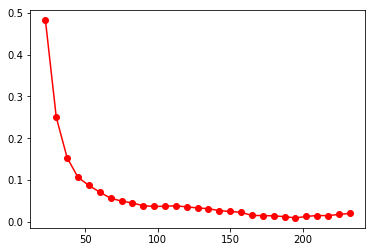

In [77]:
plt.plot(binMpc,correl,'ro-')

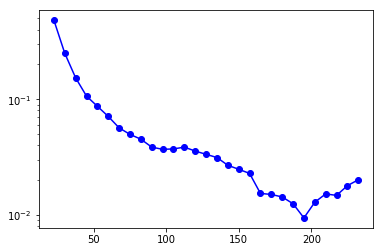

In [78]:
plt.yscale('log')
plt.plot(binMpc,correl,'bo-')
plt.show()

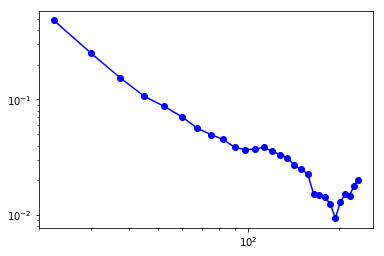

In [79]:
plt.xscale('log')
plt.yscale('log')
plt.plot(binMpc,correl,'bo-')
plt.show()

In [80]:
from operator import truediv
correl=truediv((4.0*DD-4.0*DR+1.0*RR),(1.0*RR))

In [81]:
correl

array([ 0.48214521,  0.24975965,  0.15319196,  0.10647158,  0.08700523,
        0.07106851,  0.05659743,  0.0497024 ,  0.04518531,  0.03858549,
        0.03692677,  0.03720877,  0.03858722,  0.03566922,  0.03342602,
        0.03136567,  0.02688029,  0.02482646,  0.02286129,  0.01535123,
        0.01504156,  0.01430983,  0.01250776,  0.00942828,  0.01288261,
        0.01520139,  0.0147636 ,  0.01791099,  0.02014312])

In [54]:
4.0*DD-4.0*DR+1.0*RR

array([   497388.,    940784.,   1510288.,   2202777.,   3012123.,
         3944764.,   5001194.,   6186308.,   7491653.,   8940703.,
        10517684.,  12202870.,  14029031.,  15959797.,  17993993.,
        20112902.,  22331587.,  24620837.,  26989933.,  29422067.,
        31900863.,  34424195.,  37034746.,  39690847.,  42372475.,
        45109391.,  47837628.,  50633578.,  53493065.])

In [55]:
RR

array([  497388,   940784,  1510288,  2202777,  3012123,  3944764,
        5001194,  6186308,  7491653,  8940703, 10517684, 12202870,
       14029031, 15959797, 17993993, 20112902, 22331587, 24620837,
       26989933, 29422067, 31900863, 34424195, 37034746, 39690847,
       42372475, 45109391, 47837628, 50633578, 53493065])

In [58]:
DR

array([  364243,   576887,   852514,  1190970,  1595263,  2064591,
        2589404,  3195916,  3856716,  4595335,  5397237,  6285265,
        7216973,  8192179,  9229714, 10320169, 11449362, 12631985,
       13813118, 15046732, 16325326, 17644187, 18980070, 20281487,
       21693047, 23087950, 24483081, 25952051, 27437698])

In [57]:
DD = np.array([  364243,   576887,   852514,  1190970,  1595263,  2064591,
        2589404,  3195916,  3856716,  4595335,  5397237,  6285265,
        7216973,  8192179,  9229714, 10320169, 11449362, 12631985,
       13813118, 15046732, 16325326, 17644187, 18980070, 20281487,
       21693047, 23087950, 24483081, 25952051, 27437698])

In [ ]:
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [ ]:
from lcdmmetric import *

In [ ]:
z=np.array(data['z'])

In [ ]:
zkde=z.reshape(1,-1)

In [ ]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(zkde)

In [ ]:
kde

In [ ]:
X_plot = np.arange(z.min(), z.max(), z.size())[:, np.newaxis]

In [ ]:
log_dens = kde.score_samples(zkde)

In [ ]:
log_dens

In [ ]:
d=ascii.read("./output/DR72LCsrarf.dat")

In [ ]:
d

In [ ]:
dataR=ascii.read("./output/rand200kdr72.dat")

In [ ]:
dataR['z']

In [ ]:
dataR['ra']

In [ ]:
dataR['dec']

In [ ]:
DCLCR=DC_LC(dataR['z'])

In [ ]:
rdr7f = open("./output/rDR7200kLCsrarf.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dataR)):
    rdr7f.write("%f\t " %dataR['z'][i])
    rdr7f.write("%f\t %f\t " %(dataR['ra'][i],dataR['dec'][i]))
    rdr7f.write("%f\t " %DCLCR[i])
    rdr7f.write("%f\t %f\n " %(dataR['ra'][i]*pi/180.0,dataR['dec'][i]*pi/180.0))
rdr7f.close()

In [ ]:
r=ascii.read("./output/rDR7200kLCsrarf.dat")

In [ ]:
r

In [ ]:
dr7fdat=ascii.read("./output/DR7srarf.dat")

In [ ]:
dr7fdat['s'][1:300]

In [ ]:
#fdata=fits.open("/Users/rohin/Downloads/DR7-Full.fits")

In [ ]:
#fdata.writeto("./output/DR7fulltrim.fits")

In [ ]:
fdata=fits.open("./output/DR7fulltrim.fits")

In [ ]:
cols=fdata[1].columns

In [ ]:
cols.del_col('ZTYPE')

In [ ]:
cols.del_col('SECTOR')
cols.del_col('FGOTMAIN')
cols.del_col('QUALITY')
cols.del_col('ISBAD')
cols.del_col('M')
cols.del_col('MMAX')
cols.del_col('ILSS')
cols.del_col('ICOMB')
cols.del_col('VAGC_SELECT')
cols.del_col('LSS_INDEX')
cols.del_col('FIBERWEIGHT')
cols.del_col('PRIMTARGET')
cols.del_col('MG')
cols.del_col('SECTOR_COMPLETENESS')
cols.del_col('COMOV_DENSITY')
cols.del_col('RADIAL_WEIGHT')

In [ ]:
fdata[1].columns

In [ ]:
fdata.writeto("./output/DR7fullzradec.fits")

In [ ]:
fdat=fits.open("./output/DR7fullzradec.fits")

In [ ]:
fdat[1].columns

In [ ]:
fdat[1].data['Z']

In [ ]:
fdat[1].data['RA']

In [ ]:
comovlcdm=DC_LCDM(fdat[1].data['Z'])

In [ ]:
fdat[1].data['Z']

In [ ]:
comovlcdm

In [ ]:
comovlcdm.dtype

In [ ]:
#cols=fdat[1].columns

In [ ]:
nc=fits.Column(name='COMOV',format='D',array=comovlcdm)

In [ ]:
nc1=fits.Column(name='COMOV',format='D')

In [ ]:
fdata[1].data['Z']

In [ ]:
fdata[1].data['RA']

In [ ]:
nc

In [ ]:
nc.dtype

In [ ]:
#cols.add_col(nc)

In [ ]:
fdat[1].columns

In [ ]:
fdat[1].columns.info()

In [ ]:
fdat[1].columns.add_col(nc1)

In [ ]:
fdat[1].data['COMOV']=comovlcdm

In [ ]:
comovlcdm

In [ ]:
fdat[1].data['Z']

In [ ]:
fdat[1].data['COMOV']

In [ ]:
fdat[1].data['RA']

In [ ]:
fdat[1].data['RA']=fdat[1].data['RA']*pi/180.0

In [ ]:
comovlcdm=DC_LCDM(fdat[1].data['Z'])
comovlcdm

Random catalog created based on the survey limitations also taken from http://cosmo.nyu.edu/~eak306/SDSS-LRG.html

In [ ]:
dataR=fits.open("/Users/rohin/Downloads/random-DR7-Full.fits")

In [ ]:
dataR

In [ ]:
dataR=dataR[1].data

In [ ]:
len(dataR)

In [ ]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [ ]:
pixdata = open("./output/pixdatadr72VAGCfullrand.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)-1):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(dataR['ra'][i],dataR['dec'][i]))
pixdata.close()

In [ ]:
pixdata = ascii.read("./output/pixdatadr72VAGCfullrand.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [ ]:
hpixdata

In [ ]:
hu.mollview(hpixdata,rot=180)

In [ ]:
hu.orthview(hpixdata)